In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv('/Users/abhimanyu_yadav/Desktop/Practice/Titanic/Titanic.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
missing = titanic.isnull().sum()
missing_per = (missing/titanic.shape[0])*100
dic = {"No. of Missing values": missing, 'Missing percentage': missing_per}
pd.DataFrame(dic)

,No. of Missing values,Missing percentage
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
cat_col = titanic.select_dtypes('object').columns

In [8]:
num_col = titanic.dtypes[titanic.dtypes !='object'].index
num_col

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [9]:
titanic[num_col]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


<AxesSubplot:>

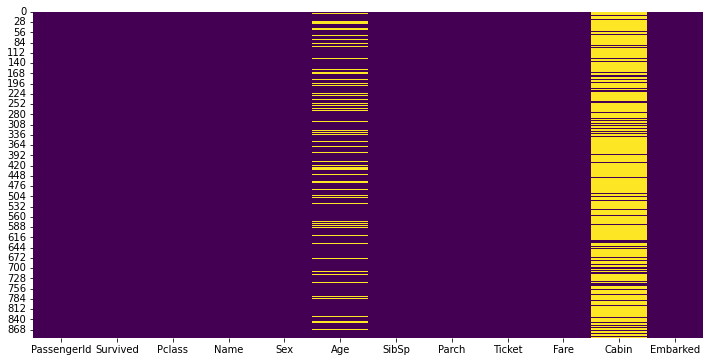

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

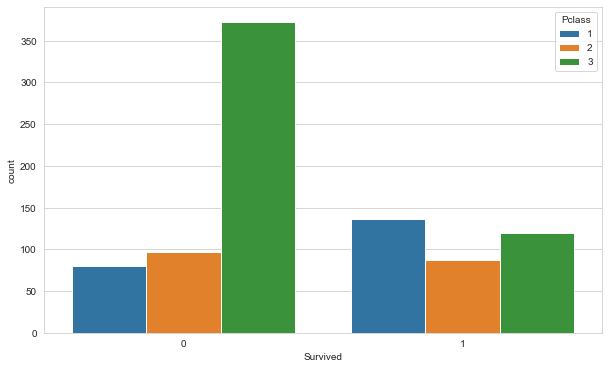

In [11]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=titanic)
plt.show()

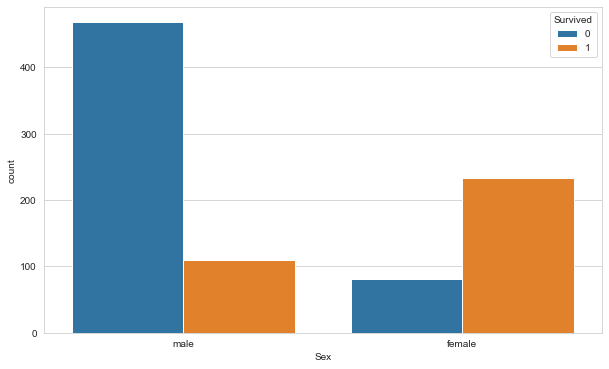

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='Survived', data= titanic)
plt.show()

# Handle Missing values

In [13]:
def missingValue(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            print("True", col)
            if col == 'Age':
                df[col].fillna(df[col].mean(), axis=0, inplace= True)
            elif col == 'Cabin':
                df[col].fillna(df[col].mode()[0], axis=0, inplace= True)
            elif col == 'Embarked':
                titanic.dropna(subset=['Embarked'], axis=0, inplace=True)


In [14]:
missingValue(titanic)

True Age
True Cabin
True Embarked


In [15]:
# Casting data type
Age = titanic['Age'].astype(int)
titanic.drop(columns=['Age'], axis=1, inplace=True)
titanic['Age'] = Age

In [16]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,B96 B98,S,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,B96 B98,S,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,B96 B98,S,35
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,B96 B98,S,27
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,19
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,B96 B98,S,29
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,26


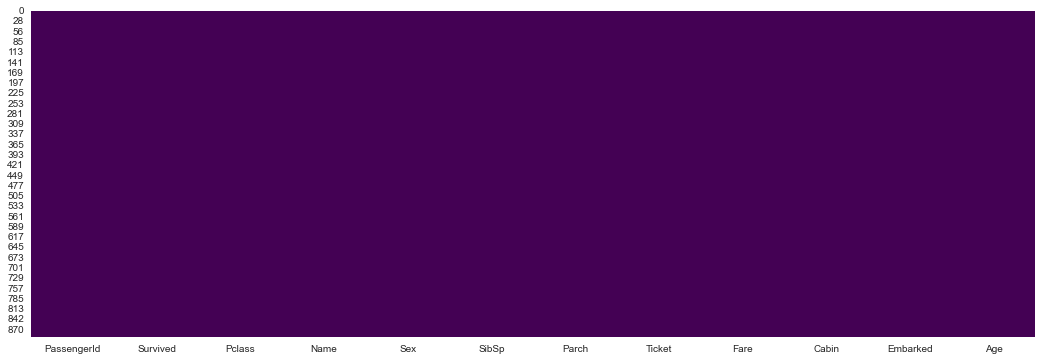

In [17]:
# Checking missing value after filling NaN
plt.figure(figsize=(18, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.show()

In [18]:
# Droping some column which is not required for model training.
titanic.drop(columns=['PassengerId', 'Name','Ticket', 'Cabin'], axis=1, inplace=True)

In [19]:
titanic

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,0,3,male,1,0,7.2500,S,22
1,1,1,female,1,0,71.2833,C,38
2,1,3,female,0,0,7.9250,S,26
3,1,1,female,1,0,53.1000,S,35
4,0,3,male,0,0,8.0500,S,35
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,27
887,1,1,female,0,0,30.0000,S,19
888,0,3,female,1,2,23.4500,S,29
889,1,1,male,0,0,30.0000,C,26


# OneHot Encoding

In [20]:
one_hot = titanic.select_dtypes('object').columns

In [21]:
for i in one_hot:
    hot = pd.get_dummies(titanic[i], prefix=i, prefix_sep='_', drop_first=True)
    titanic = titanic.join(hot)
    titanic.drop(i, axis=1, inplace=True)
titanic

,Survived,Pclass,SibSp,Parch,Fare,Age,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,22,1,0,1
1,1,1,1,0,71.2833,38,0,0,0
2,1,3,0,0,7.9250,26,0,0,1
3,1,1,1,0,53.1000,35,0,0,1
4,0,3,0,0,8.0500,35,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27,1,0,1
887,1,1,0,0,30.0000,19,0,0,1
888,0,3,1,2,23.4500,29,0,0,1
889,1,1,0,0,30.0000,26,1,0,0


# Segregate independent features and dependent features

In [22]:
X = titanic.iloc[0:,1:]
y = titanic.iloc[0:, :1]

# Model Training

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_train, y_train)

0.977491961414791

In [27]:
accuracy_score(y_test, y_pred)

0.8052434456928839

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       157
           1       0.80      0.70      0.75       110

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



In [29]:
confusion_matrix(y_test, y_pred)

array([[138,  19],
       [ 33,  77]])

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [32]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_train, y_train)

0.977491961414791

In [33]:
accuracy_score(y_test, y_pred)

0.7940074906367042

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       157
           1       0.80      0.66      0.73       110

    accuracy                           0.79       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267



# Hyperparameter tunning

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [37]:
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param, cv=5, verbose=1, n_jobs=-1)

In [38]:
#grid_search.fit(X_train,y_train)